In [1]:
from pyspark.sql import SparkSession

# Создаём сессию
spark = SparkSession.builder \
    .appName("AnalysisReport") \
    .master("local[*]") \
    .getOrCreate()

# Читаем агрегированные данные
df = spark.read.parquet("/home/jovyan/work/output/aggregated")
df.show()

+-----------+----------+------------------+--------------+
| department|avg_salary|        avg_tenure|employee_count|
+-----------+----------+------------------+--------------+
|Engineering|   75000.0|3.4000000000000004|             2|
|         HR|   55000.0|              4.79|             1|
|  Marketing|   51000.0|              3.52|             2|
+-----------+----------+------------------+--------------+



/tmp/ipykernel_146/3054093162.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=pandas_df, x="department", y="avg_salary", palette="Blues_d")


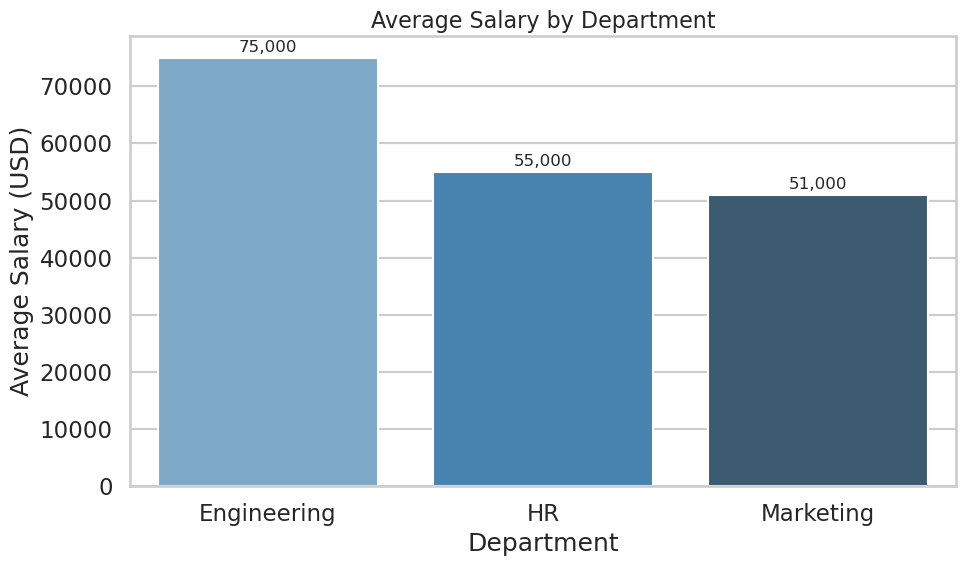

In [4]:
# Преобразуем в Pandas для визуализации
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))

pandas_df = df.toPandas()
ax = sns.barplot(data=pandas_df, x="department", y="avg_salary", palette="Blues_d")

# Подписи на столбцах
for i, row in pandas_df.iterrows():
    ax.text(i, row["avg_salary"] + 500, f"{row['avg_salary']:,.0f}", 
            ha="center", va="bottom", fontsize=12)

plt.title("Average Salary by Department", fontsize=16)
plt.xlabel("Department")
plt.ylabel("Average Salary (USD)")
plt.tight_layout()

# Сохраняем
plt.savefig("/home/jovyan/work/plots/salary_chart.png")
plt.show()